In [38]:
import yfinance as yf
from src.TimeSeries import TimeSeries
from src.TimeSeriesPlot import TimeSeriesPlot
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [39]:
# Descargar precios de MELI
meli = yf.download('MELI', start='2024-06-01')
dates = meli.index
meli_prices = meli['Close']['MELI']

[*********************100%***********************]  1 of 1 completed


In [40]:
ts_meli = TimeSeries(dates, meli_prices)
ts_meli_detrended = ts_meli.detrend_with_regression_fitting(1)

In [41]:
amzn = yf.download('AMZN', start='2024-06-01')
dates = amzn.index
amzn_prices = amzn['Close']['AMZN']

[*********************100%***********************]  1 of 1 completed


In [42]:
ts_amzn = TimeSeries(dates, amzn_prices)
ts_amzn_detrended = ts_amzn.detrend_with_regression_fitting(1)

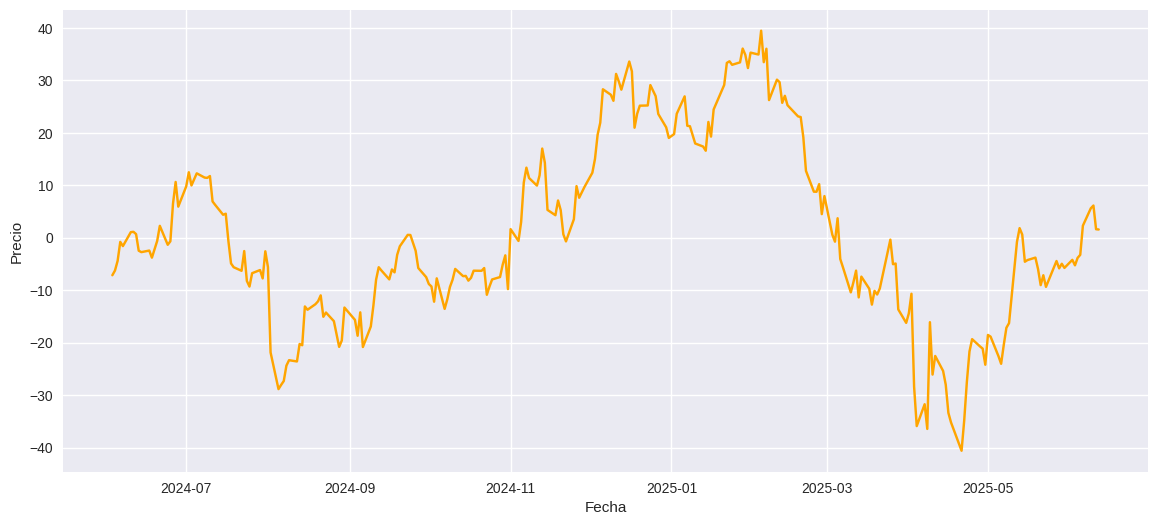

In [43]:
plot = TimeSeriesPlot(ts_amzn_detrended)
plot.add_original()

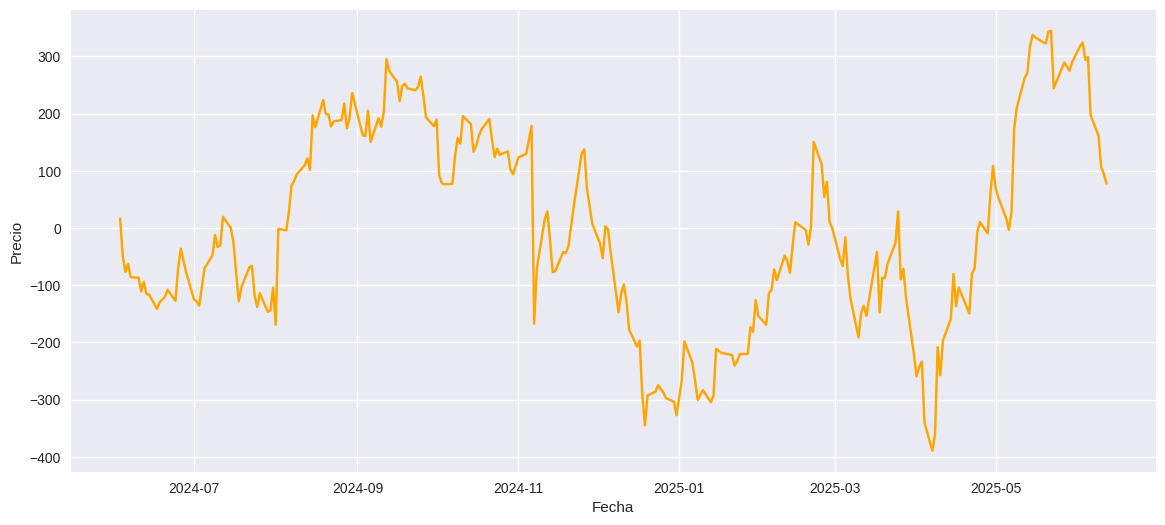

In [44]:
plot = TimeSeriesPlot(ts_meli_detrended)
plot.add_original()

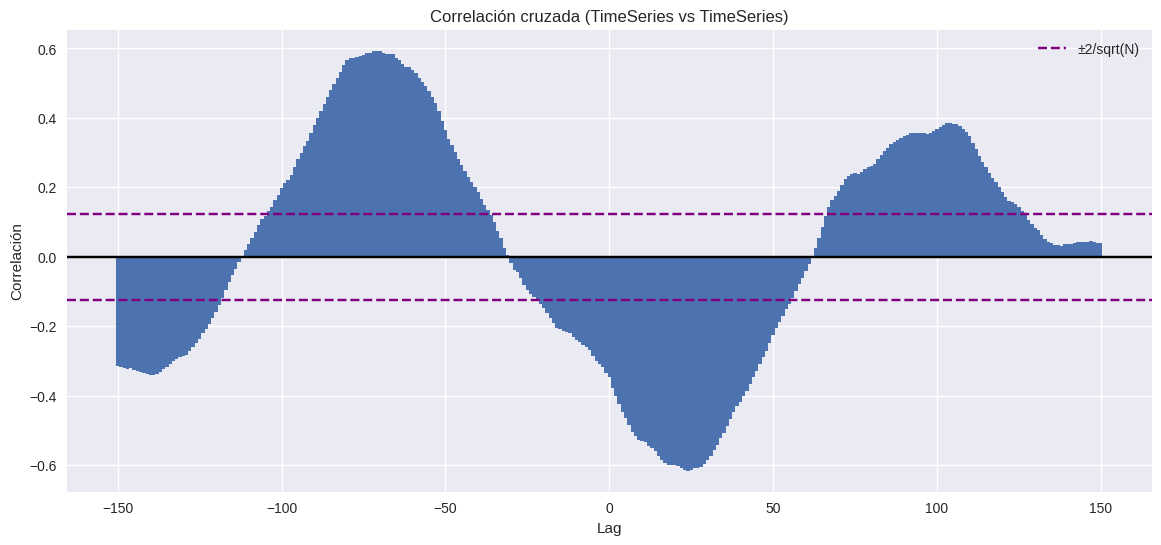

In [45]:
plot = TimeSeriesPlot(ts_meli_detrended)
plot.add_cross_correlation_plot(ts_amzn_detrended, 150)
plot.show()